In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('Algos Hands-on').getOrCreate()

24/04/18 20:53:04 WARN Utils: Your hostname, PF0P0YDX resolves to a loopback address: 127.0.1.1; using 192.168.1.23 instead (on interface wlp5s0)
24/04/18 20:53:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/18 20:53:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/18 20:53:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/18 20:53:16 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [5]:
df = spark.read.csv('file:///home/user1/Desktop/Algos Hands-on/data.csv',header='True',inferSchema='True')

In [6]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [7]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='species',outputCol='species_numeric')
indexed_df = indexer.fit(df).transform(df)
indexed_df.show()

+------------+-----------+------------+-----------+-------+---------------+
|sepal_length|sepal_width|petal_length|petal_width|species|species_numeric|
+------------+-----------+------------+-----------+-------+---------------+
|         5.1|        3.5|         1.4|        0.2| setosa|            0.0|
|         4.9|        3.0|         1.4|        0.2| setosa|            0.0|
|         4.7|        3.2|         1.3|        0.2| setosa|            0.0|
|         4.6|        3.1|         1.5|        0.2| setosa|            0.0|
|         5.0|        3.6|         1.4|        0.2| setosa|            0.0|
|         5.4|        3.9|         1.7|        0.4| setosa|            0.0|
|         4.6|        3.4|         1.4|        0.3| setosa|            0.0|
|         5.0|        3.4|         1.5|        0.2| setosa|            0.0|
|         4.4|        2.9|         1.4|        0.2| setosa|            0.0|
|         4.9|        3.1|         1.5|        0.1| setosa|            0.0|
|         5.

In [8]:
from pyspark.ml.feature import VectorAssembler

features = ['sepal_length','sepal_width','petal_length','petal_width']
assembler = VectorAssembler(inputCols=features,outputCol='feature_vector')
transformed_df = assembler.transform(indexed_df)
transformed_df.show()

+------------+-----------+------------+-----------+-------+---------------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species|species_numeric|   feature_vector|
+------------+-----------+------------+-----------+-------+---------------+-----------------+
|         5.1|        3.5|         1.4|        0.2| setosa|            0.0|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2| setosa|            0.0|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2| setosa|            0.0|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2| setosa|            0.0|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2| setosa|            0.0|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4| setosa|            0.0|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3| setosa|            0.0|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2| setosa| 

In [9]:
### Decision Tree Classifier

from pyspark.ml.classification import DecisionTreeClassifier

train_data , test_data = transformed_df.randomSplit([0.7,0.3])
dt = DecisionTreeClassifier(labelCol='species_numeric',featuresCol='feature_vector')
model = dt.fit(train_data)
predictions = model.transform(test_data)
predictions.show()

+------------+-----------+------------+-----------+----------+---------------+-----------------+--------------+-------------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|species_numeric|   feature_vector| rawPrediction|  probability|prediction|
+------------+-----------+------------+-----------+----------+---------------+-----------------+--------------+-------------+----------+
|         4.6|        3.2|         1.4|        0.2|    setosa|            0.0|[4.6,3.2,1.4,0.2]|[32.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|         4.6|        3.4|         1.4|        0.3|    setosa|            0.0|[4.6,3.4,1.4,0.3]|[32.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|         4.7|        3.2|         1.6|        0.2|    setosa|            0.0|[4.7,3.2,1.6,0.2]|[32.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|         4.8|        3.0|         1.4|        0.1|    setosa|            0.0|[4.8,3.0,1.4,0.1]|[32.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|         4.8|        3.0|         1.4|  

In [10]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='species_numeric',predictionCol='prediction',metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(accuracy)

0.9807692307692307


In [11]:
selected_cols = ['sepal_length','petal_length']
assembler = VectorAssembler(inputCols=selected_cols,outputCol='features')
df1 = assembler.transform(indexed_df)
df1.show()

+------------+-----------+------------+-----------+-------+---------------+---------+
|sepal_length|sepal_width|petal_length|petal_width|species|species_numeric| features|
+------------+-----------+------------+-----------+-------+---------------+---------+
|         5.1|        3.5|         1.4|        0.2| setosa|            0.0|[5.1,1.4]|
|         4.9|        3.0|         1.4|        0.2| setosa|            0.0|[4.9,1.4]|
|         4.7|        3.2|         1.3|        0.2| setosa|            0.0|[4.7,1.3]|
|         4.6|        3.1|         1.5|        0.2| setosa|            0.0|[4.6,1.5]|
|         5.0|        3.6|         1.4|        0.2| setosa|            0.0|[5.0,1.4]|
|         5.4|        3.9|         1.7|        0.4| setosa|            0.0|[5.4,1.7]|
|         4.6|        3.4|         1.4|        0.3| setosa|            0.0|[4.6,1.4]|
|         5.0|        3.4|         1.5|        0.2| setosa|            0.0|[5.0,1.5]|
|         4.4|        2.9|         1.4|        0.2| se

In [12]:
### PCA (Principle Component Analysis)

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features',outputCol='scaled_features')
scaler_model = scaler.fit(df1)
df_1 = scaler_model.transform(df1)
df_1.show()

+------------+-----------+------------+-----------+-------+---------------+---------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|species|species_numeric| features|     scaled_features|
+------------+-----------+------------+-----------+-------+---------------+---------+--------------------+
|         5.1|        3.5|         1.4|        0.2| setosa|            0.0|[5.1,1.4]|[6.15892840883878...|
|         4.9|        3.0|         1.4|        0.2| setosa|            0.0|[4.9,1.4]|[5.9174018045706,...|
|         4.7|        3.2|         1.3|        0.2| setosa|            0.0|[4.7,1.3]|[5.67587520030241...|
|         4.6|        3.1|         1.5|        0.2| setosa|            0.0|[4.6,1.5]|[5.55511189816831...|
|         5.0|        3.6|         1.4|        0.2| setosa|            0.0|[5.0,1.4]|[6.03816510670469...|
|         5.4|        3.9|         1.7|        0.4| setosa|            0.0|[5.4,1.7]|[6.52121831524107...|
|         4.6|        3.4|         1.

In [13]:
from pyspark.ml.feature import PCA

pca = PCA(k=2,inputCol='scaled_features',outputCol='pcaFeatures')
model = pca.fit(df_1)
df_pca = model.transform(df_1)
df_pca.show(truncate=False)

24/04/18 20:54:17 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/18 20:54:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+------------+-----------+------------+-----------+-------+---------------+---------+---------------------------------------+----------------------------------------+
|sepal_length|sepal_width|petal_length|petal_width|species|species_numeric|features |scaled_features                        |pcaFeatures                             |
+------------+-----------+------------+-----------+-------+---------------+---------+---------------------------------------+----------------------------------------+
|5.1         |3.5        |1.4         |0.2        |setosa |0.0            |[5.1,1.4]|[6.158928408838787,0.7934616853039358] |[-4.916082181022499,-3.7939579044422618]|
|4.9         |3.0        |1.4         |0.2        |setosa |0.0            |[4.9,1.4]|[5.9174018045706,0.7934616853039358]   |[-4.745297081307504,-3.623172804727267] |
|4.7         |3.2        |1.3         |0.2        |setosa |0.0            |[4.7,1.3]|[5.675875200302412,0.7367858506393691] |[-4.534436114571786,-3.4924635720329937]

In [14]:
### KMeans

assembler = VectorAssembler(inputCols=['sepal_length','sepal_width','petal_length','petal_width'],outputCol='features')
data = assembler.transform(df)
data.show()

+------------+-----------+------------+-----------+-------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species|         features|
+------------+-----------+------------+-----------+-------+-----------------+
|         5.1|        3.5|         1.4|        0.2| setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2| setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2| setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2| setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2| setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4| setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3| setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2| setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2| setosa|[4.4,2.9,1.4,0.2]|
|         4.9|        3.1|         1.5|        0.1| setosa|[4.9,

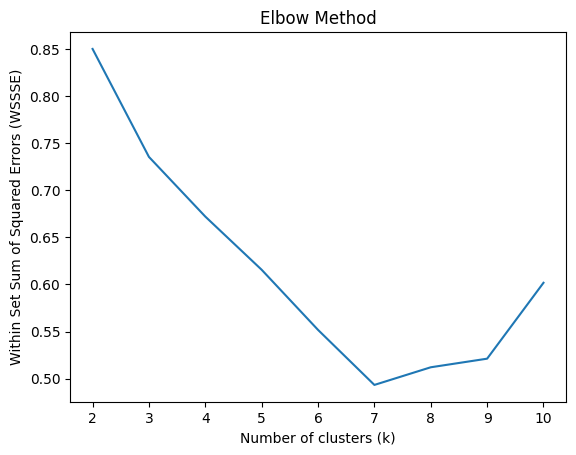

In [15]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

x=[]
for k in range(2,11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data)
    
    predictions = model.transform(data)
    
    evaluator = ClusteringEvaluator()
    wssse = evaluator.evaluate(predictions)
    x.append(wssse)

import matplotlib.pyplot as plt
plt.plot(range(2, 11), x)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method')
plt.show()



In [ ]:
kmeans = KMeans().setK(7).setSeed(1)